In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [46]:
def display_comm_sizes(Q, labels, GD, nGD):  
    
    argmaxs = []
    colors = ['violet', 'green', 'black', 'lime', 'blue', 'orange', 'brown', 'yellow', 'red', 'turquoise', 
                  'purple']
    
    for j in range(len(Q)):
        Q_mean = np.mean(Q[j], axis = 0)
        argmaxs.append(np.argmax(Q_mean))
        
    X = np.linspace(0, int(np.min([TIME-2,np.max(argmaxs)])+1), int(np.min([TIME-2,np.max(argmaxs)])+2))
        
    fig,ax = plt.subplots(1,1, figsize = (12,8))
    
    for i in range(len(Q)):
        Q_mean = np.mean(Q[i], axis = 0)
        
        if i == 0: ax.plot(Q_mean[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                               label = 'threshold = %.2f'%labels[i], 
                               linestyle = 'dashed', 
                               marker = 'v',
                               color = colors[i%11])
            
        else: ax.plot(Q_mean[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                          label = 'threshold = %.2f'%labels[i], 
                          marker = 'v', 
                          color = colors[i%11])
            
        ax.fill_between(X, 
                            np.max(Q[i], axis = 0)[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                            np.min(Q[i], axis = 0)[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                            alpha = 0.2, color = colors[i%11])
            
    ax.set_title('Ring network on 200 nodes with GD = %d, nGD = %d'%(GD, nGD), fontsize = 25)
    ax.set_xlabel('Time', fontsize = 20)
    ax.set_ylabel('Number of Active Nodes', fontsize = 20)
    ax.legend()
    ax.legend(bbox_to_anchor=(0,0.9), bbox_transform=fig.transFigure)
    return(fig,ax)

In [49]:
size = 200
GD = 6
nGD = 1
topology = 'Ring'

TIME = 200
trials = 1
C = 10000

memory = TIME
rest = 0
thresholds = np.linspace(0,0.6,31)

path = '/Users/bengieru/Neuronal_Cascades/reproduce_results/'

In [52]:
with open(path + 'comm_sizes_blue.pkl', 'rb') as handle:
    blue_1_6 = pickle.load(handle)
with open(path + 'comm_sizes_orange.pkl', 'rb') as handle:
    orange_1_6 = pickle.load(handle)
with open(path + 'comm_sizes_green.pkl', 'rb') as handle:
    green_1_6 = pickle.load(handle)
with open(path + 'comm_sizes_red.pkl', 'rb') as handle:
    red_1_6 = pickle.load(handle)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffc871eaa90>)

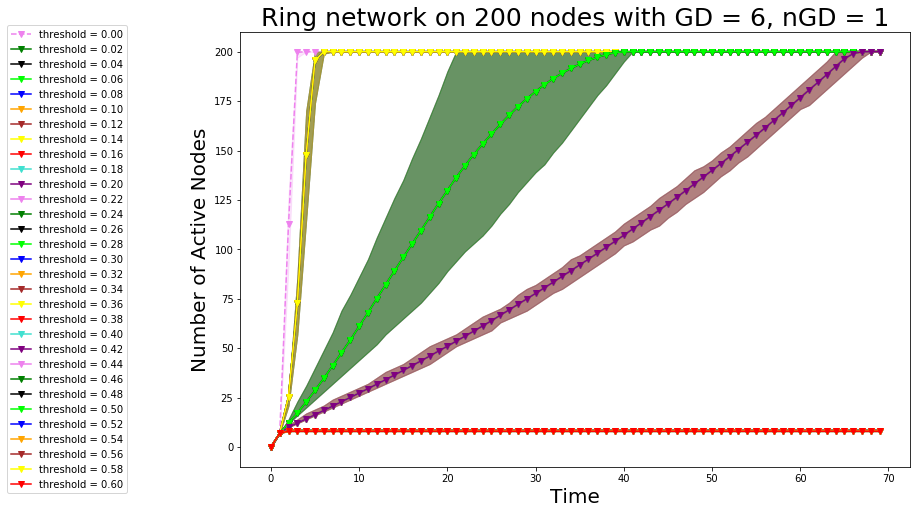

In [53]:
display_comm_sizes(blue_1_6, thresholds, 6,1)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffc88a15090>)

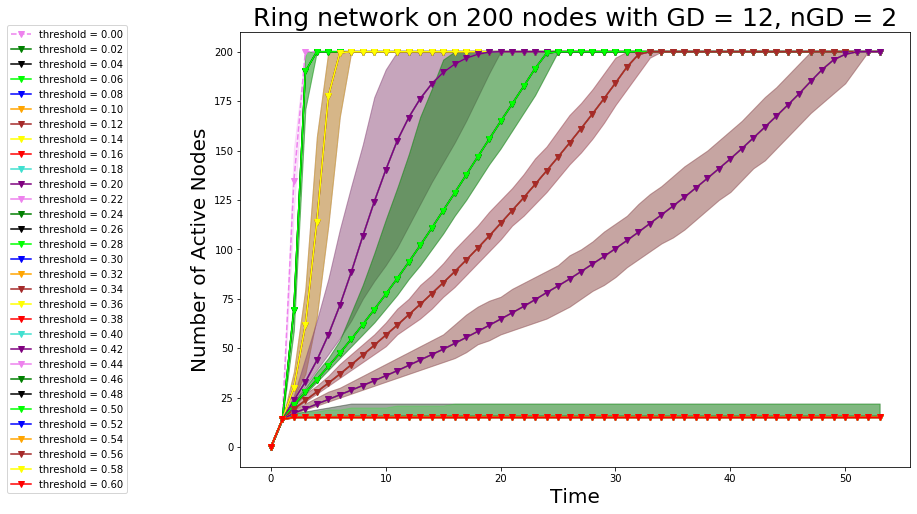

In [54]:
display_comm_sizes(orange_1_6, thresholds, 12,2)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffc88e78750>)

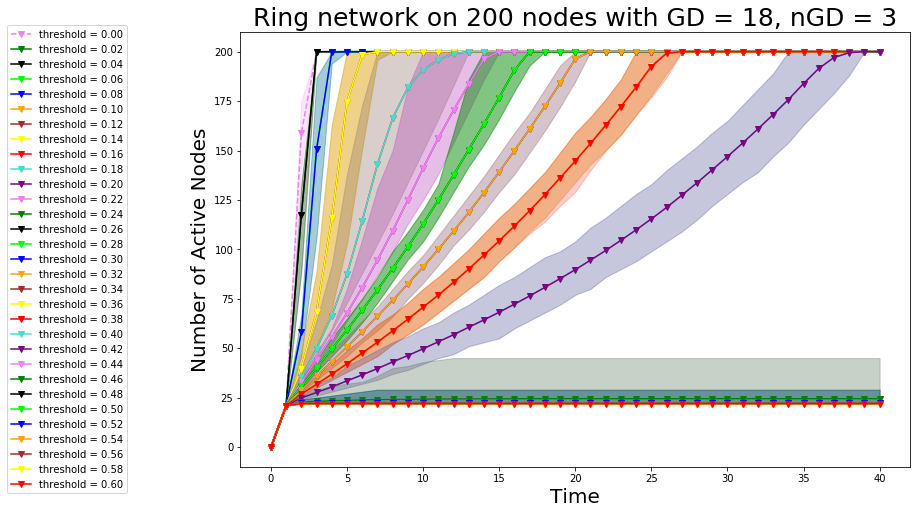

In [55]:
display_comm_sizes(green_1_6, thresholds, 18,3)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffc89310b50>)

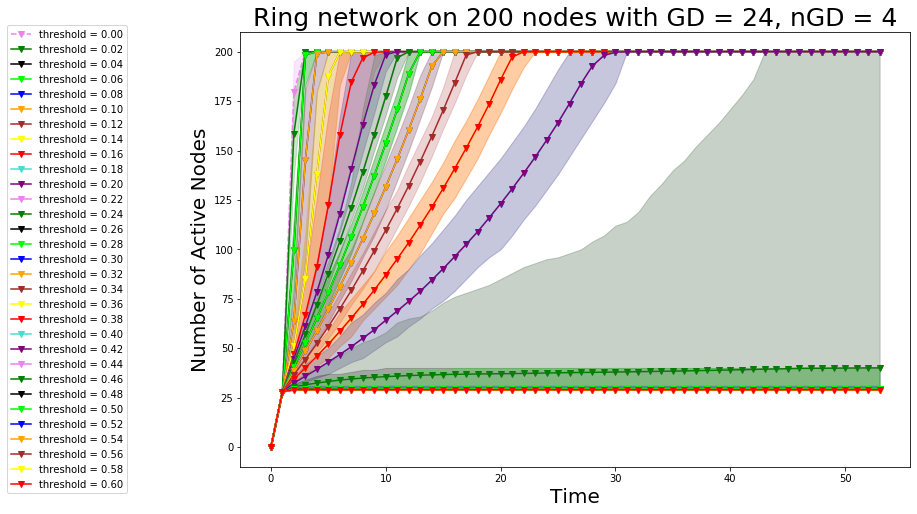

In [56]:
display_comm_sizes(red_1_6, thresholds, 24,4)

In [57]:
with open(path + 'delta_mins_blue.pkl', 'rb') as handle:
    blue_delta = pickle.load(handle)
with open(path + 'delta_mins_orange.pkl', 'rb') as handle:
    orange_delta = pickle.load(handle)
with open(path + 'delta_mins_green.pkl', 'rb') as handle:
    green_delta = pickle.load(handle)
with open(path + 'delta_mins_red.pkl', 'rb') as handle:
    red_delta = pickle.load(handle)

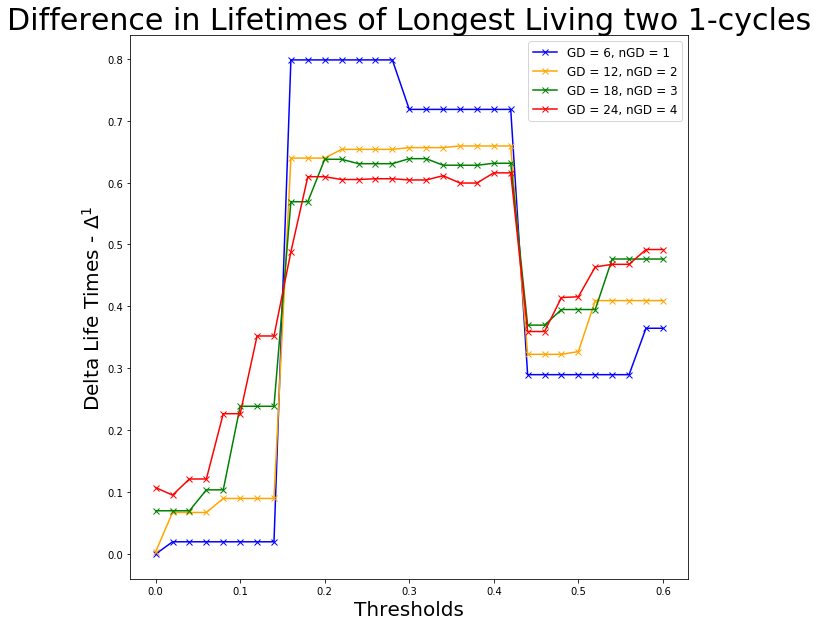

In [72]:
fig,ax = plt.subplots(1, 1, figsize = (10,10))

ax.plot(thresholds, blue_delta, label = 'GD = 6, nGD = 1', marker = 'x', color = 'blue')
ax.plot(thresholds, orange_delta, label = 'GD = 12, nGD = 2', marker = 'x', color = 'orange')
ax.plot(thresholds, green_delta, label = 'GD = 18, nGD = 3', marker = 'x', color = 'green')
ax.plot(thresholds, red_delta, label = 'GD = 24, nGD = 4', marker = 'x', color = 'red')

ax.set_title('Difference in Lifetimes of Longest Living two 1-cycles', fontsize = 30)
ax.set_xlabel('Thresholds', fontsize= 20)
ax.set_ylabel(r'Delta Life Times - $\Delta^{1}$', fontsize = 20)
ax.legend(fontsize = 'large')


In [60]:
with open(path + 'delta_matrix_mins.pkl', 'rb') as handle:
    delta_mins = pickle.load(handle)

In [65]:
from matplotlib.colors import Normalize
nGDs = [i for i in range(0,11)]
GD = 10
thresholds = np.linspace(0,0.6,31)

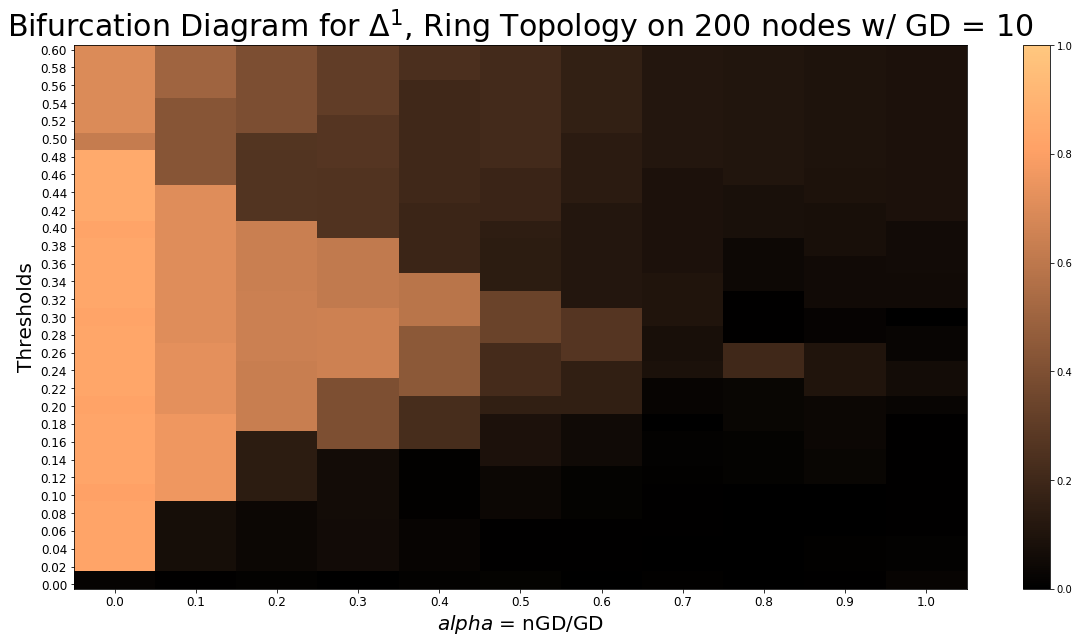

In [71]:
fig,ax = plt.subplots(1,1,figsize = (20,10))
normalize = Normalize(vmin=0, vmax=1)
im = ax.imshow(delta_mins, 
               origin = 'lower', 
               norm = normalize,
               interpolation='nearest', 
               aspect='auto',
               cmap = 'copper', 
               extent = [-.05, (nGDs[-1])/(GD)+0.05, thresholds[0]-0.005, thresholds[-1]+0.005])
ax.set_title(r'Bifurcation Diagram for $\Delta^{1}$, Ring Topology on %d nodes w/ GD = %d'%(size, GD), fontsize = 30)
ax.set_xticks(np.array(nGDs)/(GD))
ax.set_yticks(thresholds)
ax.set_xlabel('$alpha$ = nGD/GD', fontsize = 20 )
ax.set_ylabel('Thresholds', fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 12)
fig.colorbar(im)